**20BCE1858    S.V.NAVYA KALA     ML CSE4020 LAB-6**

In [ ]:
import tensorflow as tf
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import to_categorical

In [ ]:
# Getting the data ready
import os
from pathlib import Path
import pandas as pd
m1 = pd.read_csv("train.csv")
m2 = pd.read_csv("test.csv")
import warnings
warnings.filterwarnings('ignore')


In [ ]:
X_train = m1.sample(frac = 0.5)
X_val = m1.sample(frac = 0.3)
X_test = m1.sample(frac = 0.2)

In [ ]:
target=m1["Label"]
target1=X_train["Label"]
target2=X_val["Label"]
target3=X_test["Label"]

In [ ]:
y_train=target1
y_val=target2
y_test=target3
a = Sequential()
a.add(Dense(64, input_dim=80,activation = "relu")) #Layer 1
a.add(Dense(32,activation = "relu"))               #Layer 2
a.add(Dense(16,activation = "relu"))               #Layer 3
a.add(Dense(8,activation = "relu"))                #Layer 4
a.add(Dense(4,activation = "relu"))                #Layer 5
a.add(Dense(1,activation = "sigmoid"))             #Output Layer

#Configure the model
a.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

#Train the model
a.fit(X_train, y_train, batch_size=64, epochs=100, validation_data=(X_val,y_val))

Epoch 1/100
177/177 [==============================] - 3s 9ms/step - loss: -543971840.0000 - accuracy: 0.0128 - val_loss: -4045202176.0000 - val_accuracy: 0.0680
Epoch 2/100
177/177 [==============================] - 1s 6ms/step - loss: -85584756736.0000 - accuracy: 0.0888 - val_loss: -301708083200.0000 - val_accuracy: 0.0848
Epoch 3/100
177/177 [==============================] - 1s 5ms/step - loss: -1375231279104.0000 - accuracy: 0.0885 - val_loss: -3401326526464.0000 - val_accuracy: 0.0877
Epoch 4/100
177/177 [==============================] - 1s 4ms/step - loss: -9481418178560.0000 - accuracy: 0.0852 - val_loss: -19092295647232.0000 - val_accuracy: 0.0901
Epoch 5/100
177/177 [==============================] - 1s 5ms/step - loss: -39918814363648.0000 - accuracy: 0.0915 - val_loss: -70570968350720.0000 - val_accuracy: 0.0892
Epoch 6/100
177/177 [==============================] - 1s 4ms/step - loss: -123982787379200.0000 - accuracy: 0.0917 - val_loss: -196200095547392.0000 - val_accura

In [ ]:
#task-2
import pandas as pd
ml = pd.DataFrame(pd.read_excel("dl.xlsx"))
ml

,age,income,student,rating,buys
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31-40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes
5,>40,low,yes,excellent,no
6,31-40,low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes
9,>40,medium,yes,fair,yes


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
col_names = ['age','income','student','rating','buys']

In [ ]:
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
le = preprocessing.LabelEncoder()
ml['age']= le.fit_transform(ml['age'])
                                                                                                                                 

In [ ]:
ml['income']= le.fit_transform(ml['income'])

In [53]:
ml['income'].unique()

array([0, 2, 1])

In [ ]:
ml['student']= le.fit_transform(ml['student'])

In [ ]:
ml['rating']= le.fit_transform(ml['rating'])

In [ ]:
ml['buys']= le.fit_transform(ml['buys'])

In [ ]:
X = ml[['age','income','student','rating']]
y = ml['buys']

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.25      1.00      0.40         1
           1       1.00      0.25      0.40         4

    accuracy                           0.40         5
   macro avg       0.62      0.62      0.40         5
weighted avg       0.85      0.40      0.40         5



In [ ]:
print(confusion_matrix(y_test,predictions))

[[1 0]
 [3 1]]


In [ ]:
features = ['age', 'income', 'student', 'rating']

[Text(0.5, 0.8333333333333334, 'student <= 0.5\ngini = 0.494\nsamples = 9\nvalue = [4, 5]'),
 Text(0.25, 0.5, 'age <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.75, 0.5, 'rating <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]')]

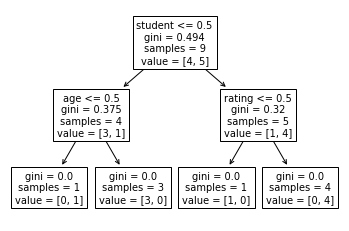

In [ ]:
from sklearn import tree
tree.plot_tree(dtree, feature_names=features)

**DECISION TREES WITHOUT USING PREDEFINED FUNCTIONS**

In [39]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):
        ''' constructor ''' 
        
        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain
        
        # for leaf node
        self.value = value

In [44]:
class DecisionTreeClassifier():
    def __init__(self, min_samples_split=2, max_depth=2):
        ''' constructor '''
        
        # initialize the root of the tree 
        self.root = None
        
        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        
    def build_tree(self, dataset, curr_depth=0):
        ''' recursive function to build the tree ''' 
        
        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)
        
        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # find the best split
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if information gain is positive
            if best_split["info_gain"]>0:
                # recur left
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                # return decision node
                return Node(best_split["feature_index"], best_split["threshold"], 
                            left_subtree, right_subtree, best_split["info_gain"])
                
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node
        return Node(value=leaf_value)
    
    def get_best_split(self, dataset, num_samples, num_features):
        ''' function to find the best split '''
        
        # dictionary to store the best split
        best_split = {}
        max_info_gain = -float("inf")
        
        # loop over all the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain
                    curr_info_gain = self.information_gain(y, left_y, right_y, "gini")
                    # update the best split if needed
                    if curr_info_gain>max_info_gain:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain
        return best_split
    
    def split(self, dataset, feature_index, threshold):
        ''' function to split the data '''
        
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right
    
    def information_gain(self, parent, l_child, r_child, mode="entropy"):
        ''' function to compute information gain '''
        
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        if mode=="gini":
            gain = self.gini_index(parent) - (weight_l*self.gini_index(l_child) + weight_r*self.gini_index(r_child))
        else:
            gain = self.entropy(parent) - (weight_l*self.entropy(l_child) + weight_r*self.entropy(r_child))
        return gain
    
    def entropy(self, y):
        ''' function to compute entropy '''
        
        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy
    def gini_index(self, y):
        ''' function to compute gini index '''
        
        class_labels = np.unique(y)
        gini = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            gini += p_cls**2
        return 1 - gini
        
    def calculate_leaf_value(self, Y):
        ''' function to compute leaf node '''
        
        Y = list(Y)
        return max(Y, key=Y.count)
    
    def print_tree(self, tree=None, indent=" "):
        ''' function to print the tree '''
        
        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.info_gain)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)
    
    def fit(self, X, Y):
        ''' function to train the tree '''
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)
    
    def predict(self, X):
        ''' function to predict new dataset '''
        
        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions
    
    def make_prediction(self, x, tree):
        ''' function to predict a single data point '''
        
        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)

In [55]:
X = ml.iloc[:, :-1].values
y = ml.iloc[:, -1].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

[Text(0.5, 0.8333333333333334, 'student <= 0.5\ngini = 0.494\nsamples = 9\nvalue = [4, 5]'),
 Text(0.25, 0.5, 'age <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.75, 0.5, 'rating <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]')]

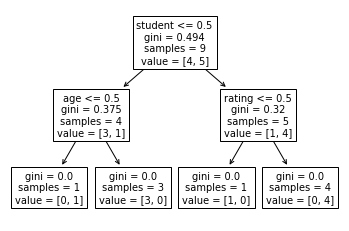

In [58]:
from sklearn import tree
tree.plot_tree(dtree, feature_names=features)

In [60]:
Y_pred = classifier.predict(X_test) 
from sklearn.metrics import accuracy_score
accuracy_score(y_test, Y_pred)

0.4